In [1]:
import numpy as np 
import matplotlib.pyplot as pp
import math

In [2]:
def moving_average(a, n) :
    if n<25 :
        Window=int(math.ceil(0.5*n))
    else :
        Window=25
    return np.sum(a[-Window-1:-1])/Window


In [3]:
Losses=np.loadtxt("Losses.txt")

Text(0.5, 1.0, 'Loss at end of training instance, $n_x=n_y=30$')

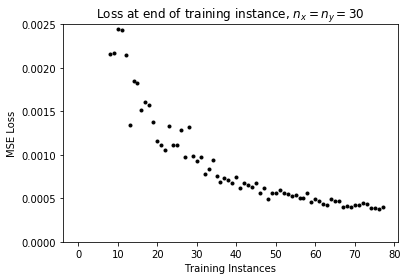

In [11]:
pp.plot(Losses[0:-1:500],".k")
pp.ylim(0,0.0025)
pp.xlabel("Training Instances")
pp.ylabel("MSE Loss")
pp.title("Loss at end of training instance, $n_x=n_y=30$")

In [5]:
PerformanceData=np.loadtxt("PerformanceData.txt")
Err_Array_ML=PerformanceData[:,0]
Err_Array=PerformanceData[:,1]
GmresTime1Arr=PerformanceData[:,2]
MLGmresTime1Arr=PerformanceData[:,3]
GmresTime2Arr=PerformanceData[:,4]
MLGmresTime2Arr=PerformanceData[:,5]


n_steps=len(MLGmresTime2Arr)
count=np.arange(0,n_steps)

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


(0, 3)

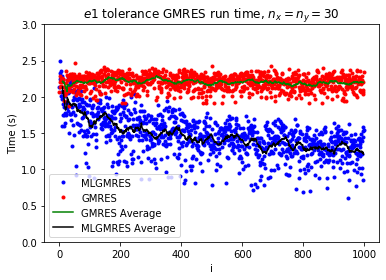

In [10]:
GmresRunTimeOriginal_AVG=np.zeros((n_steps,1))
ML_GMRES_Time_AVG=np.zeros((n_steps,1))


for j in range(0,n_steps):
    GmresRunTimeOriginal_AVG[j]=moving_average(GmresTime1Arr[:j],j)

for j in range(0,n_steps):
    ML_GMRES_Time_AVG[j]=moving_average(MLGmresTime1Arr[:j],j)
    
    
pp.plot(MLGmresTime1Arr,'.b',label='MLGMRES')
pp.plot(GmresTime1Arr,'.r', label='GMRES')
pp.plot(count[10:-1],GmresRunTimeOriginal_AVG[10:-1],'g', label='GMRES Average')
pp.plot(count[10:-1],ML_GMRES_Time_AVG[10:-1],'k', label='MLGMRES Average')

pp.ylabel('Time (s)')
pp.xlabel('i')
pp.title('$e1$ tolerance GMRES run time, $n_x=n_y=30$')
pp.legend(loc='best')
pp.ylim(0,3)

# pp.savefig('Runtime1.svg')

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


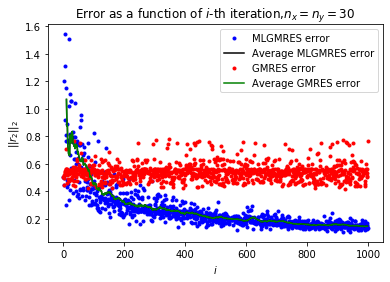

In [7]:
AVG=np.zeros((n_steps,1))
for j in range(0,n_steps):
    AVG[j]=moving_average(Err_Array_ML[:j],j)

AVGML=np.zeros((n_steps,1))
for j in range(0,n_steps):
    AVGML[j]=moving_average(Err_Array_ML[:j],j)


pp.plot(count,Err_Array_ML,'.b',label='MLGMRES error')
pp.plot(count[10:-1],AVGML[10:-1],'k',label='Average MLGMRES error')
pp.plot(count,Err_Array,'.r',label='GMRES error')
pp.plot(count[10:-1],AVG[10:-1],'g',label='Average GMRES error')

pp.xlabel('$i$')
pp.ylabel('$||r_2||_2$')
pp.title('Error as a function of $i$-th iteration,$n_x=n_y=30$ ')
pp.legend(loc='best')
# pp.savefig('Compare.svg')

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5, 1.0, 'NN Speed Up $n_x=n_y=30$ ')

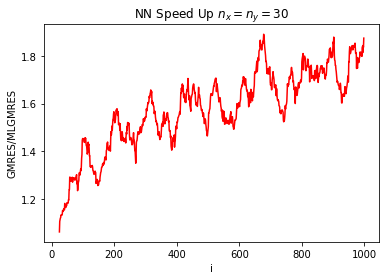

In [8]:
SpeedUpData=np.loadtxt("SpeedUpData.txt")

AVGSpeedUp=np.zeros((n_steps,1))
for j in range(0,n_steps):
    AVGSpeedUp[j]=moving_average(SpeedUpData[:j],j)

pp.plot(count[25:-1],AVGSpeedUp[25:-1], "r")
pp.xlabel('i')
pp.ylabel('GMRES/MLGMRES')
pp.title("NN Speed Up $n_x=n_y=30$ ")